In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
from collections import Counter
import re
import seaborn as sns

# Research Paper
#### To what extend do cross cultural variations influence the performance of a binary classification model designed to categorise the nationality of Reddit authors into Western or Eastern European countries?

### Read CSVs

In [3]:
nationality = pd.read_csv("data/nationality.csv")
nationality.head()

,auhtor_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland
1,t2_10uons,games won to games played. Games played is cal...,Finland
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland
4,t2_10uons,get another role than support Lel people here ...,Finland


In [4]:
nationality['nationality'].unique()

array(['Finland', 'Germany', 'Greece', 'The Netherlands', 'Ireland',
       'Spain', 'USA', 'United Kingdom', 'Denmark', 'Turkey', 'France',
       'Italy', 'Lithuania', 'Poland', 'Sweden', 'Romania', 'Switzerland',
       'Norway', 'Bulgaria', 'Hungary', 'Belgium', 'Serbia', 'Austria',
       'Ukraine', 'Croatia', 'Japan', 'Slovenia', 'Czech Republic',
       'Slovakia', 'Brazil', 'Australia', 'Cyprus', 'Luxembourg',
       'Argentina', 'Estonia', 'Philippines', 'Portugal', 'Azerbaijan',
       'Kosovo', 'Canada', 'Bosnia and Herzegovina', 'Israel', 'Mexico',
       'Armenia', 'Iceland', 'Albania', 'Georgia', 'Russia', 'Montenegro',
       'Moldova', 'Kazakhstan', 'Malta', 'Greenland', 'North Macedonia',
       'Iran', 'Chili'], dtype=object)

### Splitting the data into Western and Eastern European postings



In [5]:
Eastern = ['Greece', 'Poland', 'Romania', 'Bulgaria', 'Hungary', 'Serbia', 'Croatia', 'Slovenia', 'Czech Republic', 'Slovakia', 'Cyprus', 'Estonia', 'Kosovo', 'Bosnia and Herzegovina', 'Albania', 'Russia', 'Montenegro', 'Moldova', 'North Macedonia']

Western = ['Finland', 'Germany', 'The Netherlands', 'Ireland', 'Spain', 'United Kingdom', 'Denmark', 'France', 'Italy', 'Luxembourg', 'Belgium', 'Sweden', 'Switzerland', 'Norway', 'Portugal']

nationality['Poles'] = nationality['nationality'].apply(lambda x: 'Western' if x in Western else ('Eastern' if x in Eastern else None))

In [6]:
nationality = nationality.dropna(subset=['Poles'])
nationality

,auhtor_ID,post,nationality,Poles
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland,Western
1,t2_10uons,games won to games played. Games played is cal...,Finland,Western
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland,Western
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland,Western
4,t2_10uons,get another role than support Lel people here ...,Finland,Western
...,...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom,Western
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom,Western
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom,Western
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom,Western


### West VS. East Posts

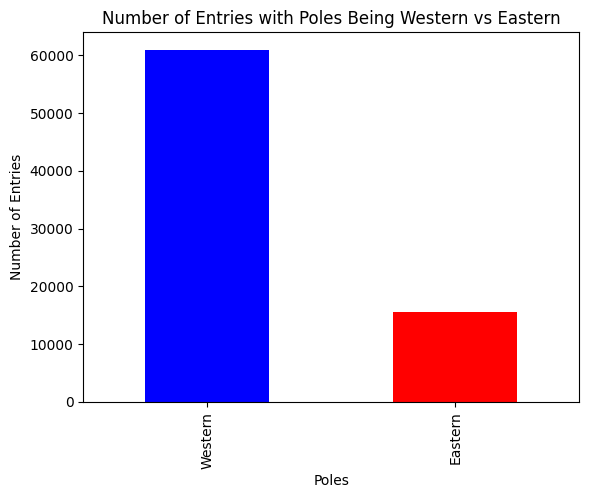

In [7]:
# Plot the bar chart
counts = nationality['Poles'].value_counts()
counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Entries with Poles Being Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Number of Entries')
plt.show()

In [11]:
western = nationality[nationality['Poles'] == 'Western']
eastern = nationality[nationality['Poles'] == 'Eastern']

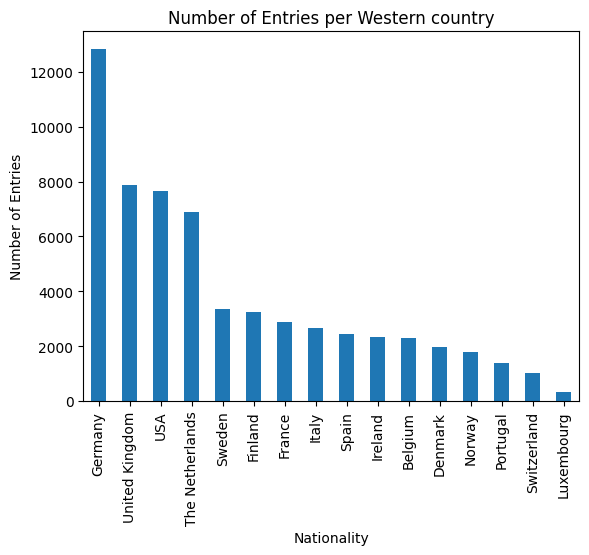

In [9]:
counts = western['nationality'].value_counts()
counts.plot(kind='bar')
plt.title('Number of Entries per Western country')
plt.xlabel('Nationality')
plt.ylabel('Number of Entries')
plt.show()

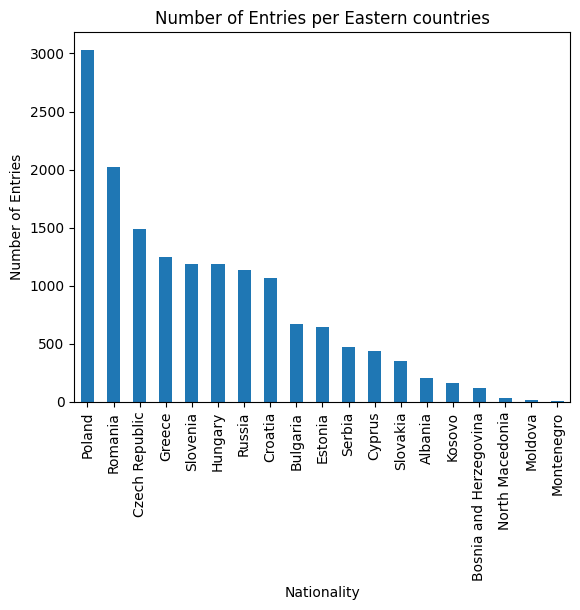

In [12]:
counts = eastern['nationality'].value_counts()
counts.plot(kind='bar')
plt.title('Number of Entries per Eastern countries')
plt.xlabel('Nationality')
plt.ylabel('Number of Entries')
plt.show()

## EDA

### Step 1: Lowercasing

In [3]:
nationality['post'] = nationality['post'].str.lower()

NameError: name 'nationality' is not defined

### Step 2: Removing Stop Words

In [17]:
# Download NLTK stopwords
nltk.download('stopwords')

# Get English stop words from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a text
def remove_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the "post" column
nationality['post'] = nationality['post'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pamelacece/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Note**: Only for English dictionary. Need to discuss if we're keeping other languages in. ONLY ENGLISH

### Step 3: Lemmatization

In [21]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_posts(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

nationality['post'] = nationality['post'].apply(lemmatize_posts)

nationality

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/pamelacece/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,auhtor_ID,post,nationality,Poles
0,t2_10uons,"isn't, show. legally binding. depends also ran...",Finland,Western
1,t2_10uons,game game played. game played calculated compa...,Finland,Western
2,t2_10uons,logic usa shitty place live (with ~1 shooting ...,Finland,Western
3,t2_10uons,"referring add lot ea, activision etc.. re-rele...",Finland,Western
4,t2_10uons,get another role support lel people thinking 2...,Finland,Western
...,...,...,...,...
82611,t2_57ogt82f,sergeant york. wwi lend it'self films. fought ...,United Kingdom,Western
82612,t2_57ogt82f,position person get short term fame committing...,United Kingdom,Western
82613,t2_57ogt82f,"read label. high red meat, yet others low. qua...",United Kingdom,Western
82614,t2_57ogt82f,traitors. suggesting treason. treason death pe...,United Kingdom,Western


### Step 4: Tokenization

In [23]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_lg")

# Function to tokenize a text using spaCy
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Apply the tokenize_text function to the "post" column
nationality['post_tokens'] = nationality['post'].apply(tokenize_text)

In [26]:
nationality.to_csv('tokenized_non-eng.csv')

### Step 5: Remove Non-English entries

In [4]:
nationality = pd.read_csv('tokenized_non-eng.csv')

Only removing the non-English tokens

In [5]:
import nltk

nltk.download('words')  # Download English word list if not already installed

# Load the English word list
english_words = set(nltk.corpus.words.words())

def remove_non_english_tokens(tokens):
    filtered_tokens = []
    current_word = ""
    for token in tokens:
        if token.isalpha():  # Check if it's a letter
            current_word += token
        else:
            if current_word.lower() in english_words:
                filtered_tokens.append(current_word)
            current_word = ""

    if current_word.lower() in english_words:  # Add the last word if needed
        filtered_tokens.append(current_word)
    return filtered_tokens

nationality = nationality.rename(columns={'post_tokens': 'tokens'})
nationality['eng_tokens'] = tqdm(nationality['tokens'].apply(remove_non_english_tokens))

[nltk_data] Downloading package words to /home/pamelacece/nltk_data...
[nltk_data]   Package words is already up-to-date!
100%|██████████| 76405/76405 [00:00<00:00, 1611125.73it/s]


In [6]:
def add_quotes(tokens):
    return ["'" + token + "'" for token in tokens]

nationality['eng_tokens'] = nationality['eng_tokens'].apply(add_quotes)


In [7]:
nationality = nationality.drop(['Unnamed: 0'], axis=1)

In [2]:
nationality.to_csv('tokenized_eng.csv', index=False)

NameError: name 'nationality' is not defined

In [3]:
nationality = pd.read_csv('tokenized_eng.csv')

In [7]:
nationality[nationality['nationality'] == 'Albania']

,auhtor_ID,post,nationality,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length,ttr,ner,norm_.,"norm_,",norm_?,norm_!,topic_distributions
13167,t2_ogyp1,"qetësohu, s’është ndonjë gjë e madhe, shumica ...",Albania,Eastern,"['[""[\'qetësohu\',"",', '""\',\',"",', '""\'s’ësht...","[""'s'"", ""'e'"", ""'e'"", ""'e'"", ""'fare'"", ""'e'"", ...",6.018418,73.482759,0.748646,"[('qetësohu', 'ORG'), ('s’është ndonjë gjë', '...",0.081257,0.100758,0.014085,0.000000,"[(10, 0.6416714), (11, 0.015580239), (13, 0.01..."
13168,t2_ogyp1,"cruel stupid though, people get smarter time e...",Albania,Eastern,"['[""[\'cruel\',"",', '""\'stupid\',"",', '""\'thou...","[""'cruel'"", ""'stupid'"", ""'though'"", ""'people'""...",6.224654,79.423077,0.767281,"[('woohoo', 'ORG'), ('albania', 'GPE'), ('one'...",0.087558,0.122120,0.005760,0.000000,"[(10, 0.62762475), (26, 0.024149375), (27, 0.3..."
13169,t2_ogyp1,buburezë (like romanian one) “bubu-“ generally...,Albania,Eastern,"['[""[\'buburezë\',"",', '""\'(\',"",', '""\'like\'...","[""'like'"", ""'one'"", ""'generally'"", ""'way'"", ""'...",5.978471,90.309859,0.745963,"[('buburezë', 'ORG'), ('romanian', 'NORP'), ('...",0.069968,0.101184,0.008611,0.000000,"[(10, 0.562486), (11, 0.025646763), (13, 0.014..."
13170,t2_ogyp1,animal settle back lowland winter trade summer...,Albania,Eastern,"['[""[\'animal\',"",', '""\'settle\',"",', '""\'bac...","[""'animal'"", ""'settle'"", ""'back'"", ""'lowland'""...",6.052632,72.536585,0.778947,"[('winter', 'DATE'), ('one', 'CARDINAL'), ('ba...",0.091228,0.076023,0.011696,0.000000,"[(10, 0.6851278), (14, 0.030192742), (15, 0.01..."
13171,t2_ogyp1,roughly meaning” place river meet/spill.” dard...,Albania,Eastern,"['[""[\'roughly\',"",', '""\'meaning\',"",', '""\'”...","[""'roughly'"", ""'meaning'"", ""'place'"", ""'river'...",6.085683,82.756410,0.762473,"[('dardhë', 'PERSON'), ('&gt', 'ORG'), ('itali...",0.084599,0.096529,0.007592,0.000000,"[(8, 0.010393743), (10, 0.64798284), (13, 0.01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44579,t2_2jogqcby,(like state things) sucks. see literal 80yo's ...,Albania,Eastern,"['[""[\'(\',"",', '""\'like\',"",', '""\'state\',"",...","[""'like'"", ""'state'"", ""'see'"", ""'literal'"", ""'...",5.770655,47.500000,0.713675,"[('80yo', 'ORG'), ('joe rogan', 'PERSON'), ('3...",0.136752,0.082621,0.019943,0.001425,"[(10, 0.8301164), (25, 0.08557597), (27, 0.083..."
45173,t2_9dg3bxni,kosovo muslim country mate. god dead. ask turk...,Albania,Eastern,"['[""[\'kosovo\',"",', '""\'muslim\',"",', '""\'cou...","[""'country'"", ""'mate'"", ""'god'"", ""'dead'"", ""'a...",4.624687,72.315217,0.616347,"[('kosovo', 'GPE'), ('muslim', 'NORP'), ('god'...",0.068390,0.027523,0.017515,0.006672,"[(1, 0.013002603), (3, 0.014200704), (5, 0.013..."
45174,t2_9dg3bxni,ja u ka nguc kishen po edhe qendren e saj e ka...,Albania,Eastern,"['[""[\'ja\',"",', '""\'u\',"",', '""\'ka\',"",', '""...","[""'u'"", ""'ka'"", ""'kishen'"", ""'po'"", ""'e'"", ""'s...",4.525510,86.810811,0.582483,"[('ja u ka', 'PERSON'), ('nguc kishen po edhe ...",0.065476,0.024660,0.011905,0.000850,"[(8, 0.041014705), (10, 0.23318018), (11, 0.09..."
45175,t2_9dg3bxni,muslim country url edit: i'd recommend mark ma...,Albania,Eastern,"['[""[\'muslim\',"",', '""\'country\',"",', '""\'ur...","[""'country'"", ""'edit'"", ""'i'"", ""'d'"", ""'recomm...",4.540456,137.313725,0.533386,"[('muslim', 'NORP'), (""mark mazower's"", 'PERSO...",0.025137,0.026709,0.014140,0.001571,"[(1, 0.0113921), (5, 0.025876855), (8, 0.04059..."


## Analysis

In [4]:
grouped = nationality.groupby('auhtor_ID').agg({'post': ' '.join, 'Poles': 'first'}).reset_index()

### Average word length

In [5]:
nationality['average_word_length'] = nationality['post'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

In [6]:
grouped['average_word_length'] = grouped['post'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

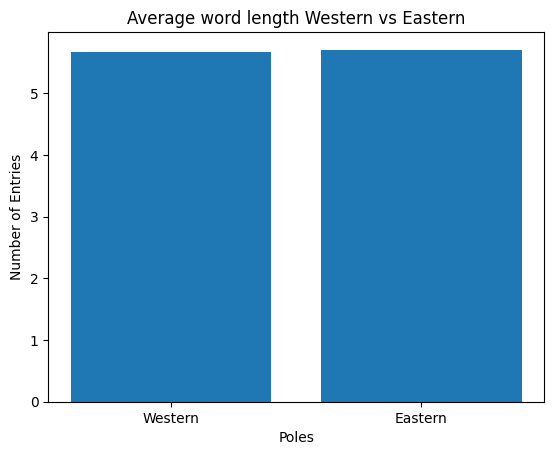

In [7]:
# Plot the bar chart
counts = grouped.groupby('Poles')['average_word_length'].median()
poles = grouped['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average word length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Number of Entries')
plt.show()

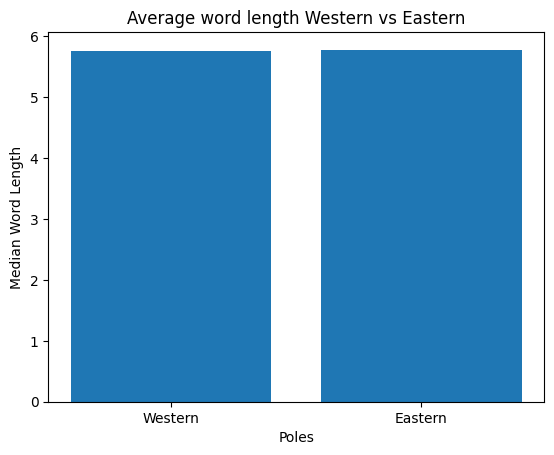

In [8]:
# Plot the bar chart
counts = nationality.groupby('Poles')['average_word_length'].median()
poles = nationality['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average word length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Median Word Length' )
plt.show()

### Average Sentence Length

In [9]:
nltk.download('punkt')

nationality['avg_sentence_length'] = nationality['post'].apply(lambda x: sum(len(s) for s in sent_tokenize(x)) / len(sent_tokenize(x)))

[nltk_data] Downloading package punkt to /home/pamelacece/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
grouped['avg_sentence_length'] = grouped['post'].apply(lambda x: sum(len(s) for s in sent_tokenize(x)) / len(sent_tokenize(x)))

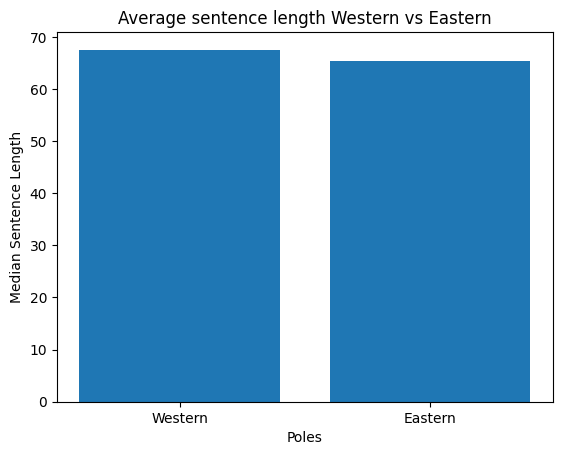

In [11]:
# Plot the bar chart
counts = nationality.groupby('Poles')['avg_sentence_length'].median()
poles = nationality['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average sentence length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Median Sentence Length')
plt.show()

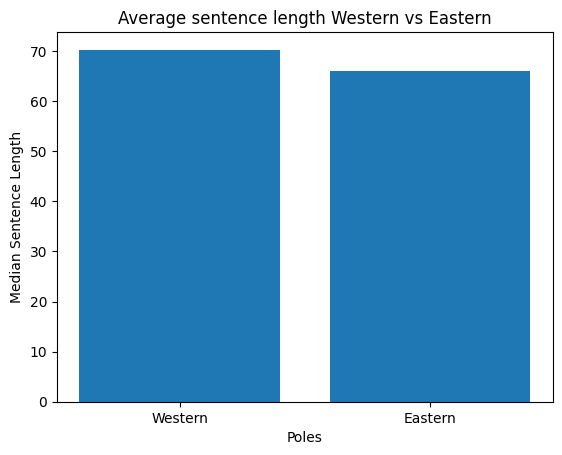

In [12]:
# Plot the bar chart
counts = grouped.groupby('Poles')['avg_sentence_length'].median()
poles = grouped['Poles'].unique()

plt.bar(poles, counts)
plt.title('Average sentence length Western vs Eastern')
plt.xlabel('Poles')
plt.ylabel('Median Sentence Length')
plt.show()

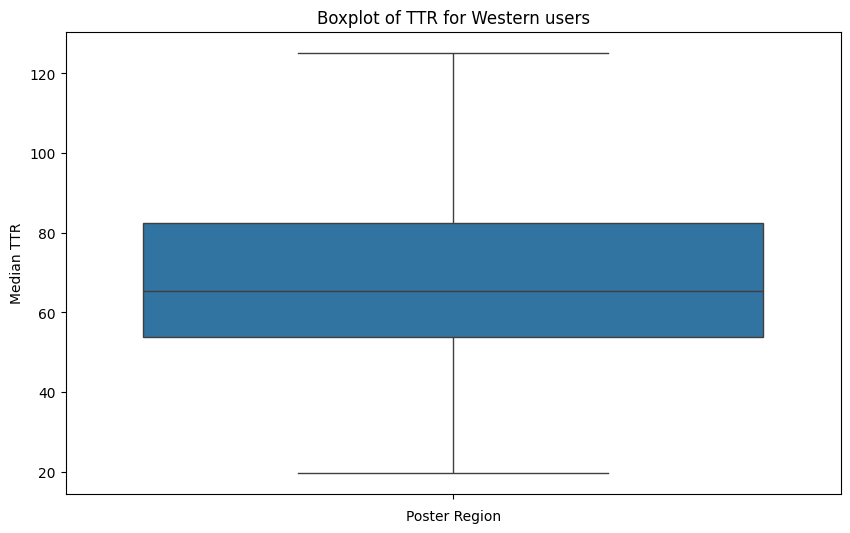

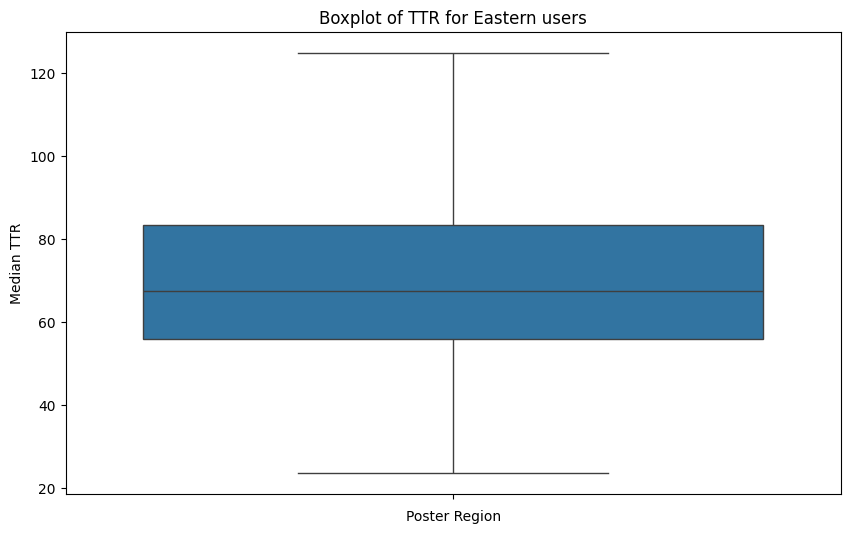

In [15]:
western = nationality[nationality['Poles'] == 'Western']
relevant_west = western['avg_sentence_length']

east = nationality[nationality['Poles'] == 'Eastern']
relevant_east = east['avg_sentence_length']

plt.figure(figsize=(10, 6))
sns.boxplot(data=relevant_west, showfliers=False)
plt.title('Boxplot of TTR for Western users')
plt.xlabel('Poster Region')
plt.ylabel('Median TTR')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=relevant_east, showfliers=False)
plt.title('Boxplot of TTR for Eastern users')
plt.xlabel('Poster Region')
plt.ylabel('Median TTR')
plt.show()

### Complexity Scores
Calculating: 

**Type-Token Ratio (TTR)**: This measures the ratio of unique words (types) to the total number of words (tokens) in a text. A higher TTR indicates greater lexical richness and potentially complex vocabulary.

**Zipf's Law Analysis**: This examines the distribution of word frequencies in the text. A steeper "head" of the distribution with highly frequent words and a longer "tail" of less frequent words can indicate richer vocabulary.


In [13]:
# Calculating TTR
def calculate_ttr(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words)

# Assuming your DataFrame is named 'reddit_df' with a column named 'post_text'
nationality['ttr'] = nationality['post'].apply(calculate_ttr)
grouped['ttr'] = grouped['post'].apply(calculate_ttr)

# nationality.drop('Unnamed: 0', axis=1, inplace=True)

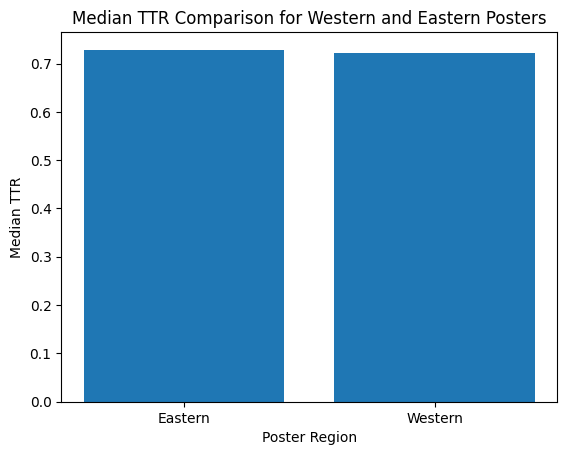

In [14]:
# Group by poster region and calculate median TTR
median_ttr_by_region = nationality.groupby('Poles')['ttr'].median()

# Create bar chart
regions = median_ttr_by_region.index.tolist()
median_ttr_values = median_ttr_by_region.tolist()

plt.bar(regions, median_ttr_values)
plt.xlabel("Poster Region")
plt.ylabel("Median TTR")
plt.title("Median TTR Comparison for Western and Eastern Posters")
plt.show()

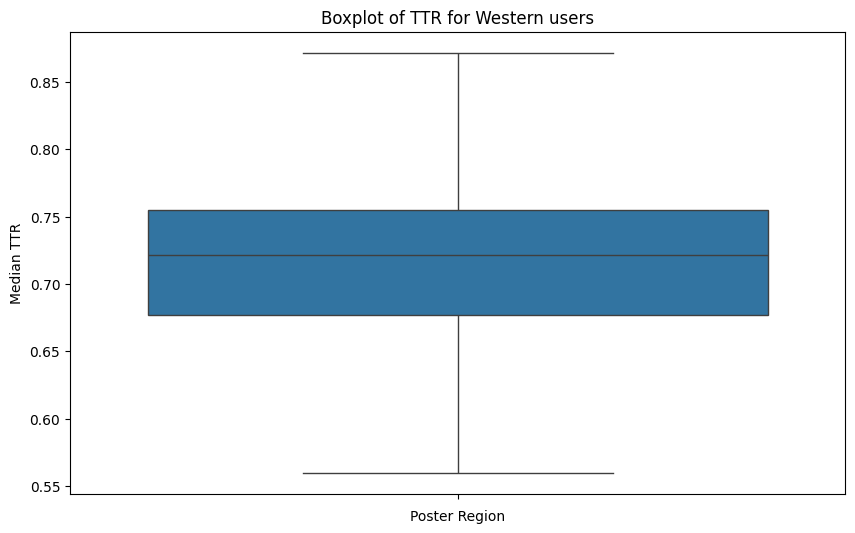

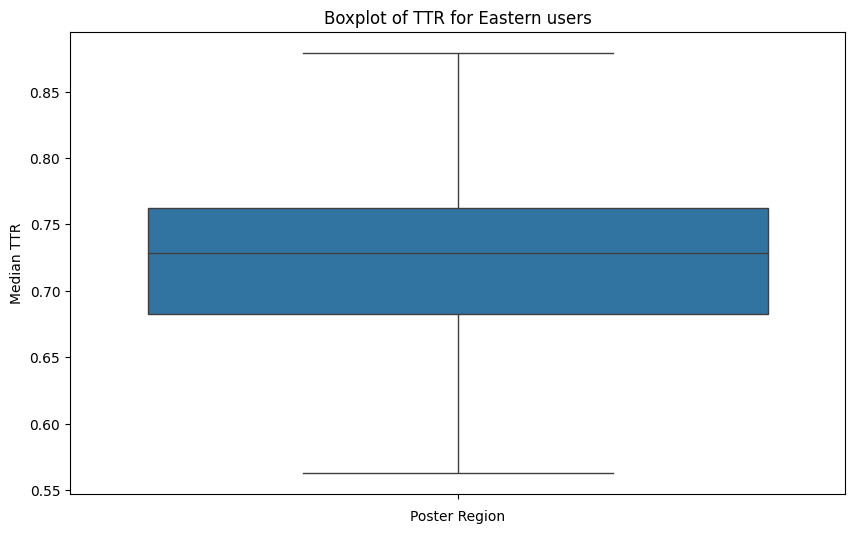

In [14]:
western = nationality[nationality['Poles'] == 'Western']
relevant_west = western['ttr']

east = nationality[nationality['Poles'] == 'Eastern']
relevant_east = east['ttr']

plt.figure(figsize=(10, 6))
sns.boxplot(data=relevant_west, showfliers=False)
plt.title('Boxplot of TTR for Western users')
plt.xlabel('Poster Region')
plt.ylabel('Median TTR')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=relevant_east, showfliers=False)
plt.title('Boxplot of TTR for Eastern users')
plt.xlabel('Poster Region')
plt.ylabel('Median TTR')
plt.show()

**Steeper Head**: Indicates a more focused topic or limited vocabulary.
**Longer Tail**: Suggests greater lexical diversity or specialized terminology.
**Curvature**: Might imply different writing styles or genres within the text.

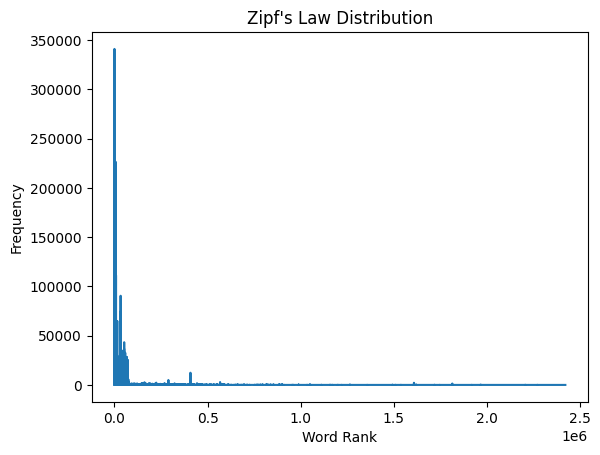

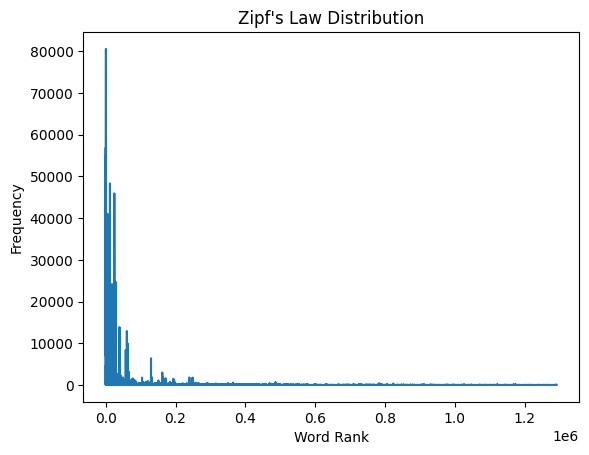

In [16]:
def analyze_zipfs_law(text):
    word_counts = Counter(text.split())
    word_ranks = range(1, len(word_counts) + 1)
    word_frequencies = list(word_counts.values())

    plt.plot(word_ranks, word_frequencies)
    plt.xlabel("Word Rank")
    plt.ylabel("Frequency")
    plt.title("Zipf's Law Distribution")
    plt.show()

western = nationality[nationality['Poles'] == 'Western']
eastern = nationality[nationality['Poles'] == 'Eastern']

# Apply the function to your DataFrame
analyze_zipfs_law(" ".join(western['post'].tolist()))
analyze_zipfs_law(" ".join(eastern['post'].tolist()))

### Punctuation use

In [5]:
def count_punctuation(text):
    counts = {}
    for mark in [".", ",", "?", "!"]:
        counts[f'{mark}_count'] = len(re.findall(re.escape(mark), text))
    return counts

nationality['punctuation_counts'] = nationality['post'].apply(count_punctuation)

# Extract individual punctuation count columns
for mark in [".", ",", "?", "!"]:
    nationality[f'{mark}_count'] = nationality['punctuation_counts'].apply(lambda x: x[f'{mark}_count'])

# Normalize counts
for mark in [".", ",", "?", "!"]:
    nationality[f'norm_{mark}'] = nationality[f'{mark}_count'] / nationality['post'].apply(lambda x: len(x.split()))

# Group and analyze
grouped_data = nationality.groupby('Poles')[['norm_.', 'norm_,', 'norm_?', 'norm_!']].describe()

nationality = nationality.drop(['punctuation_counts', 'Unnamed: 0', '._count', ',_count', '?_count', '!_count'], axis = 1)

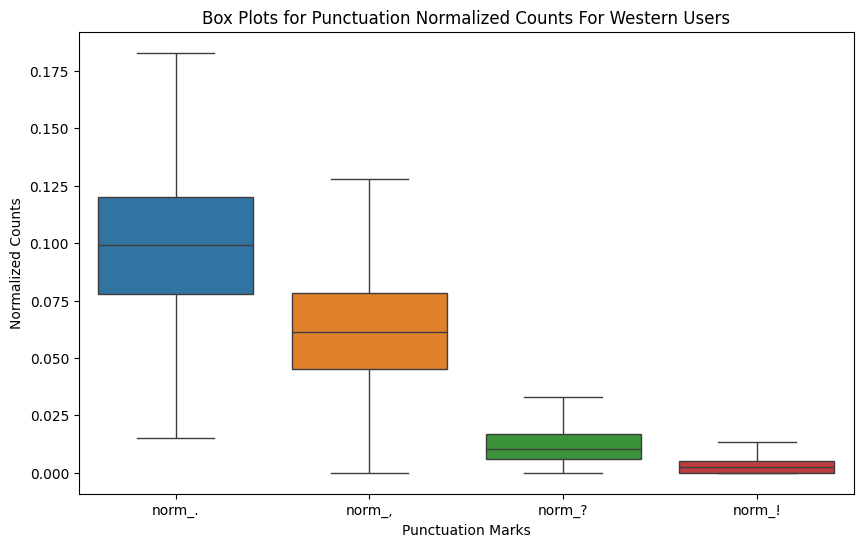

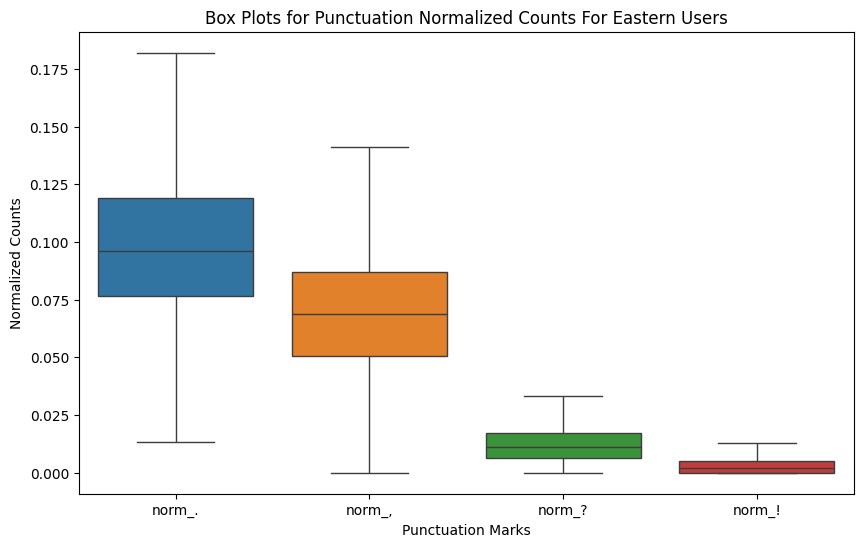

In [10]:
western = nationality[nationality['Poles'] == 'Western']
east = nationality[nationality['Poles'] == 'Eastern']

# Combine the relevant columns into a single DataFrame
boxplot_west = western[['norm_.', 'norm_,', 'norm_?', 'norm_!']]
boxplot_east = east[['norm_.', 'norm_,', 'norm_?', 'norm_!']]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_west, showfliers=False)
plt.title('Box Plots for Punctuation Normalized Counts For Western Users')
plt.xlabel('Punctuation Marks')
plt.ylabel('Normalized Counts')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_east, showfliers=False)
plt.title('Box Plots for Punctuation Normalized Counts For Eastern Users')
plt.xlabel('Punctuation Marks')
plt.ylabel('Normalized Counts')
plt.show()

### Extract NER

In [24]:
nlp = spacy.load("en_core_web_lg") 

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to each post and create the new column
nationality["ner"] = nationality["post"].apply(extract_entities)

In [ ]:
# Analyze entities for each group
eastern_entities = [entity for post_entities in east["ner"] for entity in post_entities]
western_entities = [entity for post_entities in western["ner"] for entity in post_entities]

# Count entity occurrences for each group
eastern_entity_counts = Counter(entity for entity, label in eastern_entities)
western_entity_counts = Counter(entity for entity, label in western_entities)

In [20]:
from scipy.stats import chi2_contingency

# Create a table with entity counts for each group
contingency_table = pd.crosstab(nationality["Poles"], nationality["ner"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 76405.00000000001
p-value: 0.49319656201086565
Degrees of freedom: 76399


A higher chi-square value suggests a stronger association between the group and entity frequencies.

## Topic Modelling

In [4]:
from gensim import corpora
from gensim.models import LdaModel

#nationality = nationality.drop(['topic_distributions'], axis=1)
nationality["tokens"] = nationality["tokens"].apply(lambda x: x.split())

dictionary = corpora.Dictionary(nationality["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in nationality["tokens"]]

num_topics = 30  # Adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

topic_distributions = []
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc)
    topic_distributions.append(topic_distribution)
    
nationality["topic_distributions"] = topic_distributions

### Most Frequent Topics

In [5]:
western = nationality[nationality['Poles'] == 'Western']
eastern = nationality[nationality['Poles'] == 'Eastern']

In [6]:
# Get a list of all topic IDs and their corresponding probabilities across all posts
all_topic_probabilities_western = [item for sublist in western["topic_distributions"] for item in sublist]

all_topic_probabilities_eastern = [item for sublist in eastern["topic_distributions"] for item in sublist]

# Count the occurrences of each topic ID
topic_counts_west = {topic_id: all_topic_probabilities_western.count(topic_id) for topic_id in set(all_topic_probabilities_western)}

topic_counts_east = {topic_id: all_topic_probabilities_eastern.count(topic_id) for topic_id in set(all_topic_probabilities_eastern)}

# Sort the topics by their frequency in descending order
most_frequent_topics_west = sorted(topic_counts_west.items(), key=lambda x: x[1], reverse=True)

most_frequent_topics_east = sorted(topic_counts_east.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 most frequent topics along with their counts
print("Most frequent topics for western users:")
for topic_id, count in most_frequent_topics_west[:5]:
    print(f"Topic {topic_id}: {count} occurrences")
    
print("Most frequent topics for eastern users:")
for topic_id, count in most_frequent_topics_east[:5]:
    print(f"Topic {topic_id}: {count} occurrences")


Most frequent topics for western users:
Topic (7, 0.10446613): 2 occurrences
Topic (13, 0.18191606): 2 occurrences
Topic (23, 0.13093492): 2 occurrences
Topic (22, 0.5495496): 2 occurrences
Topic (13, 0.39237246): 2 occurrences
Most frequent topics for eastern users:
Topic (7, 0.2318146): 2 occurrences
Topic (7, 0.09249169): 2 occurrences
Topic (23, 0.1575958): 2 occurrences
Topic (21, 0.43431756): 2 occurrences
Topic (21, 0.759244): 2 occurrences


### Topics Visualized

In [7]:
import pyLDAvis.gensim

# Create the visualization
pyLDAvis.enable_notebook()  # If using a Jupyter Notebook
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

In [5]:
nationality

,auhtor_ID,post,nationality,Poles,tokens,eng_tokens,average_word_length,avg_sentence_length,ttr,ner,norm_.,"norm_,",norm_?,norm_!,topic_distributions
0,t2_10uons,"isn't, show. legally binding. depends also ran...",Finland,Western,"['[""[\'is\',"",', '\'""n\\\'t"",\',', '""\',\',"",'...","[""'is'"", ""'n'"", ""'t'"", ""'show'"", ""'legally'"", ...",5.744459,50.730000,0.676662,"[('uk us', 'PERSON'), ('two', 'CARDINAL'), ('o...",0.125163,0.035202,0.015645,0.003911,"[(25, 0.8116855), (27, 0.18461613)]"
1,t2_10uons,game game played. game played calculated compa...,Finland,Western,"['[""[\'game\',"",', '""\'game\',"",', '""\'played\...","[""'game'"", ""'game'"", ""'game'"", ""'calculated'"",...",5.815094,50.113208,0.680503,"[('half', 'CARDINAL'), ('0.5', 'CARDINAL'), ('...",0.135849,0.027673,0.013836,0.003774,"[(10, 0.03548529), (25, 0.75914997), (27, 0.20..."
2,t2_10uons,logic usa shitty place live (with ~1 shooting ...,Finland,Western,"['[""[\'logic\',"",', '""\'usa\',"",', '""\'shitty\...","[""'logic'"", ""'place'"", ""'live'"", ""'with'"", ""'s...",5.732911,55.585106,0.681013,"[('logic usa shitty place', 'ORG'), ('million'...",0.111392,0.041772,0.012658,0.005063,"[(25, 0.9813763), (27, 0.017674072)]"
3,t2_10uons,"referring add lot ea, activision etc.. re-rele...",Finland,Western,"['[""[\'referring\',"",', '""\'add\',"",', '""\'lot...","[""'add'"", ""'lot'"", ""'ea'"", ""'re'"", ""'release'""...",5.890951,48.915966,0.661253,"[('year', 'DATE'), ('kyllä', 'ORG'), ('tuntuu ...",0.132251,0.039443,0.022042,0.022042,"[(10, 0.07604084), (25, 0.42412332), (27, 0.49..."
4,t2_10uons,get another role support lel people thinking 2...,Finland,Western,"['[""[\'get\',"",', '""\'another\',"",', '""\'role\...","[""'get'"", ""'another'"", ""'role'"", ""'support'"", ...",5.804756,48.880734,0.685857,"[('23', 'CARDINAL'), ('22', 'CARDINAL'), ('and...",0.125156,0.027534,0.010013,0.002503,"[(10, 0.010025548), (25, 0.6885383), (27, 0.30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68754,t2_57ogt82f,sergeant york. wwi lend it'self films. fought ...,United Kingdom,Western,"['[""[\'sergeant\',"",', '""\'york\',"",', '""\'.\'...","[""'sergeant'"", ""'york'"", ""'lend'"", ""'it'"", ""'s...",5.957219,45.882883,0.762032,"[('wwi', 'GPE'), (""it'self"", 'NORP'), ('europe...",0.145722,0.096257,0.002674,0.000000,"[(10, 0.10453826), (25, 0.3624893), (27, 0.531..."
68755,t2_57ogt82f,position person get short term fame committing...,United Kingdom,Western,"['[""[\'position\',"",', '""\'person\',"",', '""\'g...","[""'position'"", ""'person'"", ""'get'"", ""'short'"",...",6.026212,42.942623,0.771953,"[('american', 'NORP'), ('qatar', 'GPE'), ('qat...",0.154653,0.107471,0.005242,0.000000,"[(10, 0.13018796), (25, 0.27562556), (27, 0.58..."
68756,t2_57ogt82f,"read label. high red meat, yet others low. qua...",United Kingdom,Western,"['[""[\'read\',"",', '""\'label\',"",', '""\'.\',"",...","[""'read'"", ""'label'"", ""'high'"", ""'red'"", ""'mea...",5.902069,45.333333,0.736552,"[('first', 'ORDINAL'), ('raisin sultana', 'ORG...",0.151724,0.099310,0.000000,0.000000,"[(25, 0.3330163), (27, 0.65687734)]"
68757,t2_57ogt82f,traitors. suggesting treason. treason death pe...,United Kingdom,Western,"['[""[\'traitors\',"",', '""\'.\',"",', '""\'sugges...","[""'suggesting'"", ""'treason'"", ""'treason'"", ""'d...",5.982804,46.558559,0.773810,"[('99%', 'PERCENT'), ('first', 'ORDINAL'), ('o...",0.144180,0.116402,0.002646,0.000000,"[(25, 0.47421244), (27, 0.52370197)]"


In [19]:
nationality.to_csv('tokenized_eng.csv', index=False)